In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# setting options to display max rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv(r"D:\Data Science Bootcamp\Deep Learning\Activity\students_adaptability_level_online_education.csv")

In [5]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [6]:
df.tail()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1204,Girl,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Moderate


In [7]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [9]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

## Encoding

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Initialize the encoders
onehot_encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()

# DataFrames for the encoded data
encoded_data_onehot = pd.DataFrame()
encoded_data_label = pd.DataFrame()

# Columns for one-hot encoding and label encoding
columns_onehot = ['Gender', 'Institution Type', 'IT Student', 'Location', 'Self Lms']
columns_label = ['Age', 'Education Level', 'Load-shedding', 'Financial Condition', 
                 'Internet Type', 'Network Type', 'Class Duration', 'Device', 'Adaptivity Level']

# Applying one-hot encoding
for column in columns_onehot:
    encoded_column = pd.DataFrame(onehot_encoder.fit_transform(df[[column]]))
    encoded_column.columns = [f"{column.replace(' ', '_')}_{val}" for val in onehot_encoder.get_feature_names_out()]
    encoded_data_onehot = pd.concat([encoded_data_onehot, encoded_column], axis=1)

# Applying label encoding
for column in columns_label:
    encoded_data_label[column] = label_encoder.fit_transform(df[column])

# Merging the two encoded DataFrames
encoded_combined = pd.concat([encoded_data_onehot, encoded_data_label], axis=1)

# Display the first few rows of the combined encoded data
encoded_combined.head()

,Gender_Gender_Boy,Gender_Gender_Girl,Institution_Type_Institution Type_Government,Institution_Type_Institution Type_Non Government,IT_Student_IT Student_No,IT_Student_IT Student_Yes,Location_Location_No,Location_Location_Yes,Self_Lms_Self Lms_No,Self_Lms_Self Lms_Yes,Age,Education Level,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Device,Adaptivity Level
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,3,2,1,0,1,2,2,2,2
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,3,2,0,0,0,2,1,1,2
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2,0,1,0,1,2,1,1,2
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,1,0,0,2,1,1,2
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2,1,1,1,0,1,0,1,1


## Correlation Analysis

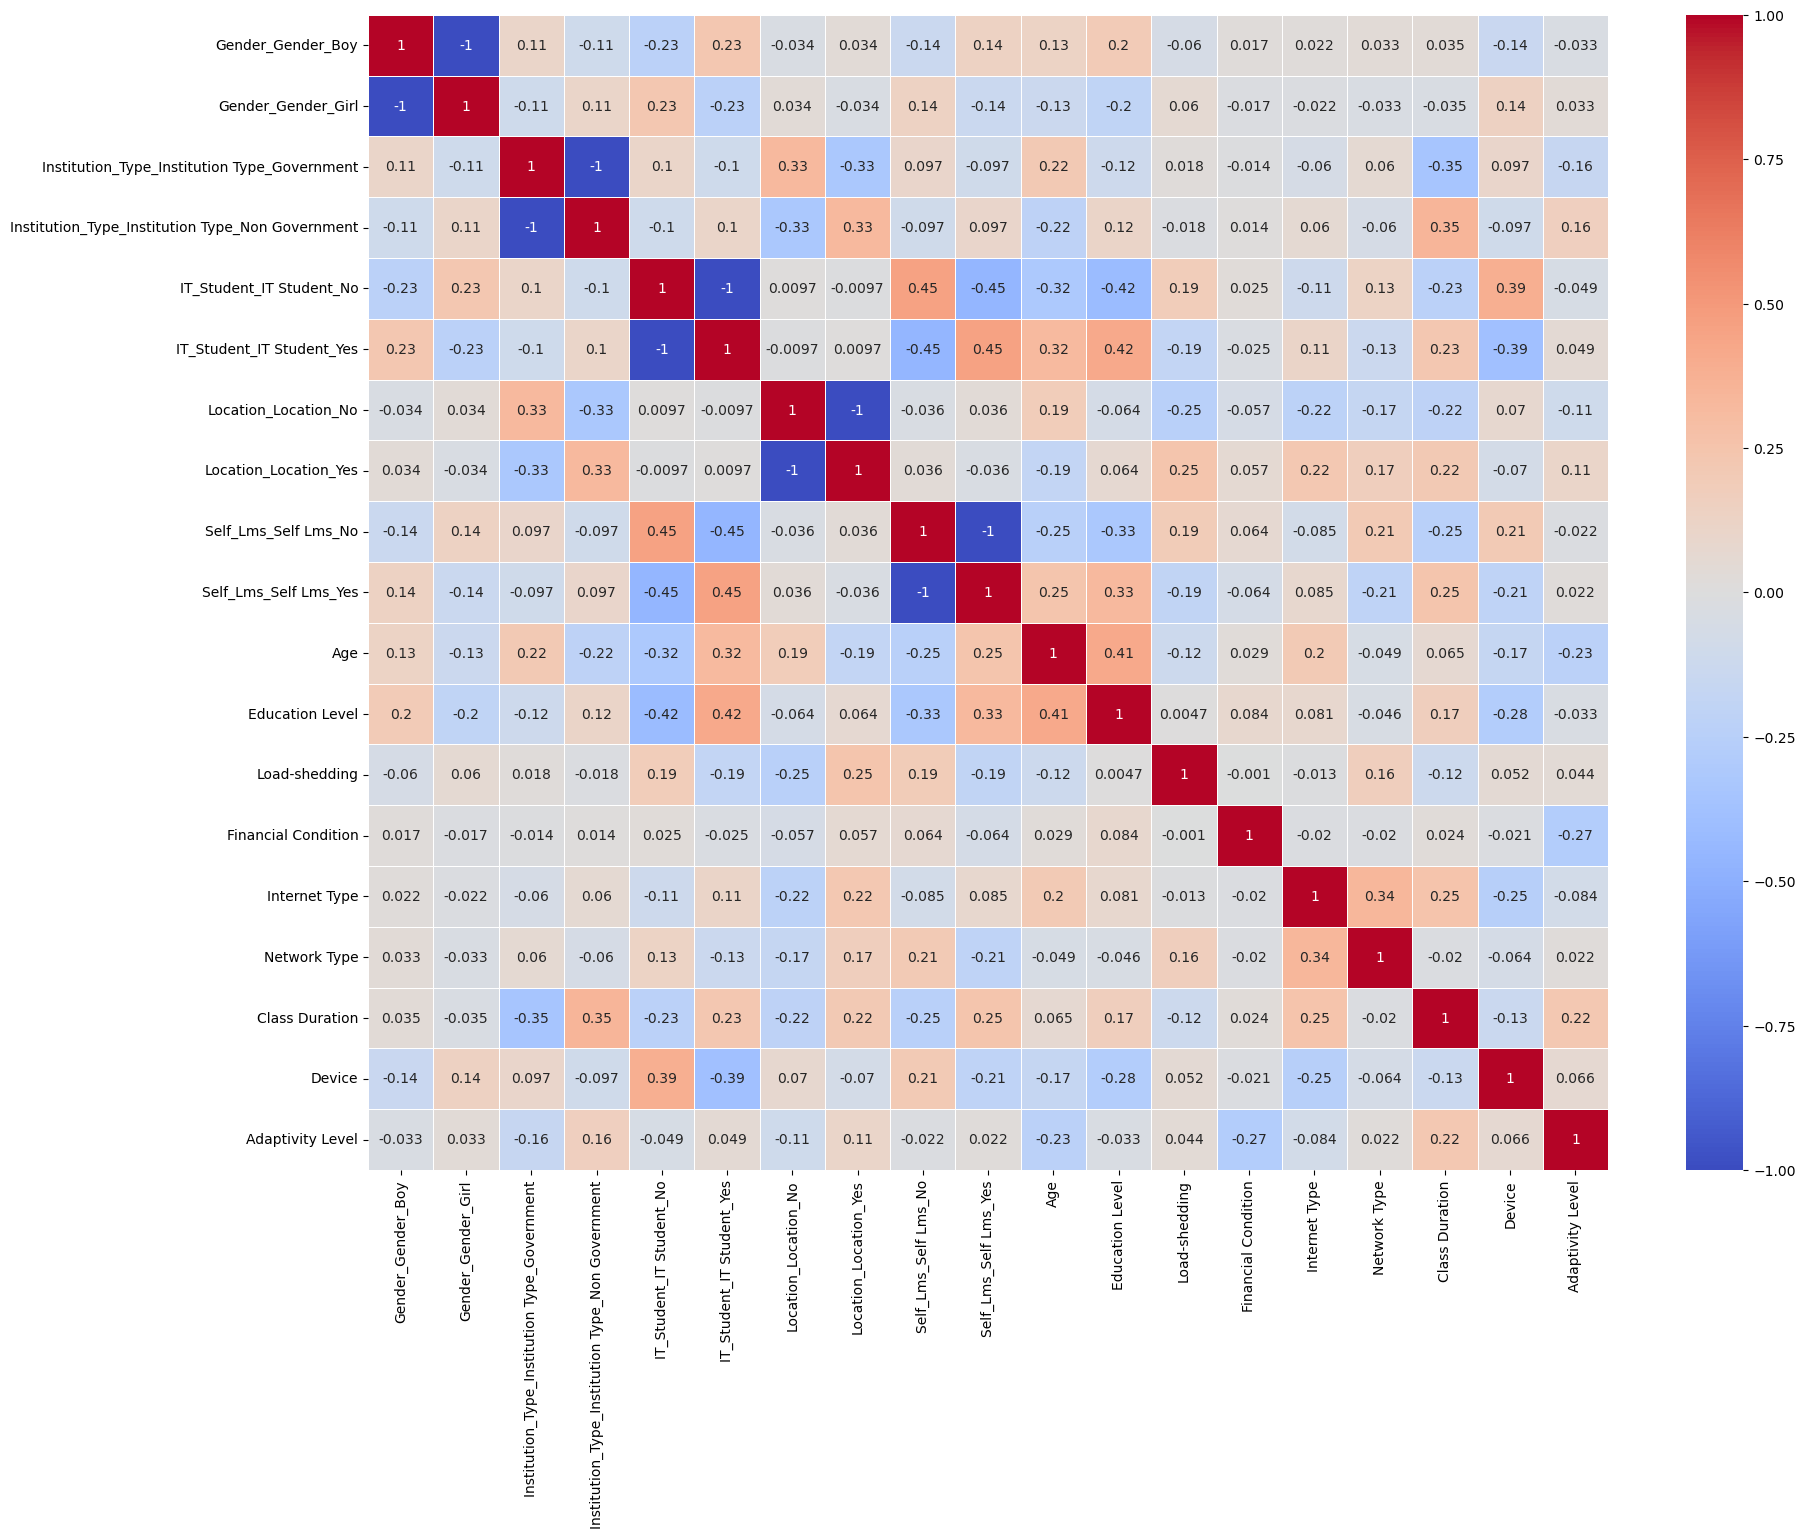

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recalculate the correlation matrix for the combined encoded dataset
correlation_matrix_combined = encoded_combined.corr()

# Set the size for the heatmap
plt.figure(figsize=(20, 15))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.show()

## Standardization

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_standard = StandardScaler()

# Apply standardization to the combined encoded dataset
standardized_data = scaler_standard.fit_transform(encoded_combined)

# Convert the numpy array back to a DataFrame for better readability
standardized_df = pd.DataFrame(standardized_data, columns=encoded_combined.columns)

# Display the first few rows of the standardized data
standardized_df.head()

,Gender_Gender_Boy,Gender_Gender_Girl,Institution_Type_Institution Type_Government,Institution_Type_Institution Type_Non Government,IT_Student_IT Student_No,IT_Student_IT Student_Yes,Location_Location_No,Location_Location_Yes,Self_Lms_Self Lms_No,Self_Lms_Self Lms_Yes,Age,Education Level,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Device,Adaptivity Level
0,0.904155,-0.904155,-0.681290,0.681290,0.580864,-0.580864,-0.537373,0.537373,0.459408,-0.459408,0.725027,1.112419,0.447436,-0.565091,1.167367,0.723409,1.737449,2.890610,0.879343
1,-1.106005,1.106005,-0.681290,0.681290,0.580864,-0.580864,-0.537373,0.537373,-2.176717,2.176717,0.725027,1.112419,-2.234955,-0.565091,-0.856629,0.723409,-0.086267,0.285386,0.879343
2,-1.106005,1.106005,1.467805,-1.467805,0.580864,-0.580864,-0.537373,0.537373,0.459408,-0.459408,-0.101517,-1.657136,0.447436,-0.565091,1.167367,0.723409,-0.086267,0.285386,0.879343
3,-1.106005,1.106005,-0.681290,0.681290,0.580864,-0.580864,-0.537373,0.537373,0.459408,-0.459408,-0.928062,-0.272359,0.447436,-0.565091,-0.856629,0.723409,-0.086267,0.285386,0.879343
4,-1.106005,1.106005,-0.681290,0.681290,0.580864,-0.580864,-0.537373,0.537373,0.459408,-0.459408,-0.101517,-0.272359,0.447436,1.087664,-0.856629,-1.218034,-1.909983,0.285386,-0.678905


## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'encoded_combined' DataFrame is already defined and available
X = encoded_combined.drop('Adaptivity Level', axis=1)  # Features
y_corrected = encoded_combined['Adaptivity Level']    # Target variable

# Splitting the data
X_train, X_test, y_train_corrected, y_test_corrected = train_test_split(X, y_corrected, test_size=0.2, random_state=42)

# Initializing and fitting the Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train_corrected)

# Predictions and evaluation
y_pred_dt_corrected = decision_tree_model.predict(X_test)
accuracy_dt_corrected = accuracy_score(y_test_corrected, y_pred_dt_corrected)
class_report_dt_corrected = classification_report(y_test_corrected, y_pred_dt_corrected)

print(accuracy_dt_corrected)
print(class_report_dt_corrected)

0.9087136929460581
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.93      0.94      0.94       103
           2       0.90      0.93      0.91       115

    accuracy                           0.91       241
   macro avg       0.89      0.84      0.86       241
weighted avg       0.91      0.91      0.91       241



## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'encoded_combined' DataFrame is already defined and available
X = encoded_combined.drop('Adaptivity Level', axis=1)  # Features
y_corrected = encoded_combined['Adaptivity Level']    # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train_corrected, y_test_corrected = train_test_split(
    X, y_corrected, test_size=0.2, random_state=42
)

# Initializing the Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Fitting the model to the training data
random_forest_model.fit(X_train, y_train_corrected)

# Predicting the target variable for the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculating accuracy and generating the classification report for the Random Forest model
accuracy_rf = accuracy_score(y_test_corrected, y_pred_rf)
class_report_rf = classification_report(y_test_corrected, y_pred_rf)

# Printing the accuracy
print("Accuracy:", accuracy_rf)

# Printing the classification report
print("\nClassification Report:\n", class_report_rf)

Accuracy: 0.9045643153526971

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.93      0.92      0.93       103
           2       0.89      0.94      0.91       115

    accuracy                           0.90       241
   macro avg       0.90      0.84      0.86       241
weighted avg       0.90      0.90      0.90       241



## Support Vector Machine (SVM)

In [30]:
# from sklearn.svm import SVC

X = encoded_combined.drop('Adaptivity Level', axis=1)  # Features
y_corrected = encoded_combined['Adaptivity Level']    # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train_corrected, y_test_corrected = train_test_split(
    X, y_corrected, test_size=0.2, random_state=42
)

# Initializing the Support Vector Classifier
svm_model = SVC(random_state=42)

# Fitting the model to the training data
svm_model.fit(X_train, y_train_corrected)

# Predicting the target variable for the test set
y_pred_svm = svm_model.predict(X_test)

# Calculating accuracy and generating the classification report for the SVM model
accuracy_svm = accuracy_score(y_test_corrected, y_pred_svm)
class_report_svm = classification_report(y_test_corrected, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("\nClassification Report:\n", class_report_svm)

Accuracy: 0.7593360995850622

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.57      0.62        23
           1       0.91      0.61      0.73       103
           2       0.70      0.93      0.80       115

    accuracy                           0.76       241
   macro avg       0.77      0.70      0.72       241
weighted avg       0.79      0.76      0.75       241



## Hyperparameter tuning on Decision Tree

In [32]:
from sklearn.model_selection import GridSearchCV

# Parameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the Decision Tree Classifier for GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting GridSearchCV to the data
grid_search.fit(X_train, y_train_corrected)

# Best parameters
best_params = grid_search.best_params_

# Best model
best_dt_model = grid_search.best_estimator_

# Predicting with the best model
y_pred_best_dt = best_dt_model.predict(X_test)

# Calculating accuracy and generating the classification report for the best Decision Tree model
accuracy_best_dt = accuracy_score(y_test_corrected, y_pred_best_dt)
class_report_best_dt = classification_report(y_test_corrected, y_pred_best_dt)

# Printing the best parameters, accuracy, and classification report
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_best_dt)
print("\nClassification Report:\n", class_report_best_dt)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9087136929460581

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.93      0.94      0.94       103
           2       0.90      0.93      0.91       115

    accuracy                           0.91       241
   macro avg       0.89      0.84      0.86       241
weighted avg       0.91      0.91      0.91       241

